<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/JARVIS_TopologicalSpillage_High_throughput_Discovery_of_Topologically_Non_trivial_Materials_using_Spin_orbit_Spillage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[High-throughput Discovery of Topologically Non-trivial Materials using Spin-orbit Spillage](https://www.nature.com/articles/s41598-019-45028-y)

In [1]:
!pip install jarvis-tools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 962 kB 5.1 MB/s 
     |████████████████████████████████| 325 kB 51.7 MB/s 


Example material: https://www.ctcms.nist.gov/~knc6/static/JARVIS-DFT/JVASP-1044.xml

In [2]:
#MAIN-MAGSCFBAND
!wget https://github.com/usnistgov/jarvis/blob/master/jarvis/tests/testfiles/analysis/topological/WAVECAR.nosoc?raw=true -O WAVECAR.nosoc

--2022-06-26 16:40:06--  https://github.com/usnistgov/jarvis/blob/master/jarvis/tests/testfiles/analysis/topological/WAVECAR.nosoc?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/usnistgov/jarvis/raw/master/jarvis/tests/testfiles/analysis/topological/WAVECAR.nosoc [following]
--2022-06-26 16:40:06--  https://github.com/usnistgov/jarvis/raw/master/jarvis/tests/testfiles/analysis/topological/WAVECAR.nosoc
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/usnistgov/jarvis/master/jarvis/tests/testfiles/analysis/topological/WAVECAR.nosoc [following]
--2022-06-26 16:40:06--  https://raw.githubusercontent.com/usnistgov/jarvis/master/jarvis/tests/testfiles/analysis/topological/WAVECAR.nosoc
Resolving raw.githubusercontent.com (raw.githubuserconten

In [3]:
#MAIN-SOCSCFBAND
!wget https://github.com/usnistgov/jarvis/blob/master/jarvis/tests/testfiles/analysis/topological/WAVECAR.soc?raw=true -O WAVECAR.soc

--2022-06-26 16:40:07--  https://github.com/usnistgov/jarvis/blob/master/jarvis/tests/testfiles/analysis/topological/WAVECAR.soc?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/usnistgov/jarvis/raw/master/jarvis/tests/testfiles/analysis/topological/WAVECAR.soc [following]
--2022-06-26 16:40:07--  https://github.com/usnistgov/jarvis/raw/master/jarvis/tests/testfiles/analysis/topological/WAVECAR.soc
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/usnistgov/jarvis/master/jarvis/tests/testfiles/analysis/topological/WAVECAR.soc [following]
--2022-06-26 16:40:07--  https://raw.githubusercontent.com/usnistgov/jarvis/master/jarvis/tests/testfiles/analysis/topological/WAVECAR.soc
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 

In [4]:
from jarvis.analysis.topological.spillage import Spillage
import os

wf_noso = "WAVECAR.nosoc"
wf_so = "WAVECAR.soc"
spl = Spillage(wf_noso=wf_noso, wf_so=wf_so)
info = spl.overlap_so_spinpol()
spillage = round(info["spillage"], 2)
print (spillage)

------------------------------------

                   INDIRECT DIRECT      HOMO/LUMO (eV)
no spin-orbit gaps -6.189 -0.000     [12.570632190600326, 6.381782093579036]
spin-orbit gaps    -5.649 +0.000     [12.340773399339255, 6.692078190678097]

gamma max 0.47728166420938756  at k =   [ 0.2857 -0.2857  0.5   ]
0.48


In [5]:
info.keys()

dict_keys(['spillage', 'spillage_k', 'kpoints', 'kmax', 'noso_direct', 'so_direct', 'x_axis', 'y_axis', 'so_lumo', 'so_homo', 'noso_lumo', 'noso_homo'])

Text(0.5, 0, 'K-points')

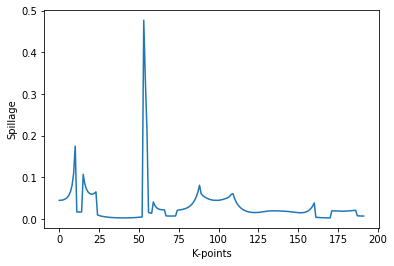

In [11]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(info['spillage_k'])
plt.ylabel('Spillage')
plt.xlabel('K-points')